In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


# Importing and preparing the dataset

In [25]:
#preparing directory to load dataset
data_dir = '6 class csv.csv'
os.chdir('../')
os.chdir('kaggle//input/star-dataset/')

* Cleaning the dataframe and columns for future analysis:

In [26]:
#reading out the dataset
stars_df = pd.read_csv(data_dir)

#replaces the spaces " " in column names with underscore "_"
stars_df.columns = stars_df.columns.str.replace(' ','_') 

#delete all spaces ' ' and hyphens '-' in Star_color column to make clean for typos and clones
stars_df.Star_color = stars_df["Star_color"].str.replace(' ','')
stars_df.Star_color = stars_df["Star_color"].str.replace('-','')

#converts all colors in Star_color column to lowercase
stars_df.Star_color = stars_df["Star_color"].str.lower()

stars_df

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0,red,M
1,3042,0.000500,0.1542,16.60,0,red,M
2,2600,0.000300,0.1020,18.70,0,red,M
3,2800,0.000200,0.1600,16.65,0,red,M
4,1939,0.000138,0.1030,20.06,0,red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,blue,O
236,30839,834042.000000,1194.0000,-10.63,5,blue,O
237,8829,537493.000000,1423.0000,-10.73,5,white,A
238,9235,404940.000000,1112.0000,-11.23,5,white,A


# Description of dataframe

In [27]:
#number of star samples and attributes
num_stars = stars_df.shape[0]
num_attributes = stars_df.shape[1]
attributes = stars_df.columns.values
print("The dataset contains {} attributes from {} stars. \nThe attributes: \n{}. ".format(num_attributes, num_stars, attributes))

The dataset contains 7 attributes from 240 stars. 
The attributes: 
['Temperature_(K)' 'Luminosity(L/Lo)' 'Radius(R/Ro)'
 'Absolute_magnitude(Mv)' 'Star_type' 'Star_color' 'Spectral_Class']. 


In [28]:
#ranges of the temperatures of the stars

temp_range_df = stars_df.sort_values('Temperature_(K)', ascending = True)
print("The range of temperatures of the stars in Kelvin in the dataframe is from {} K - {} K".format(temp_range_df["Temperature_(K)"].min(),temp_range_df["Temperature_(K)"].max()))

The range of temperatures of the stars in Kelvin in the dataframe is from 1939 K - 40000 K


In [29]:
#the different colors featured in the stars
colors = stars_df.Star_color.unique()
print("The dataset features {} different colors of stars, specifically: \n{}".format(len(colors), colors))

The dataset features 12 different colors of stars, specifically: 
['red' 'bluewhite' 'white' 'yellowishwhite' 'paleyelloworange' 'blue'
 'whitish' 'yellowwhite' 'orange' 'whiteyellow' 'yellowish' 'orangered']


In [30]:
#star types and spectral classes
star_types = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']
types = stars_df.Star_type.unique()
print("The numbers {} in the Star_types column correspond to the types of stars: {}, respectively".format(types, star_types))

The numbers [0 1 2 3 4 5] in the Star_types column correspond to the types of stars: ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant'], respectively


# Analysis and Visualization

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (17, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Distribution of Spectral classes

* First let's see how many data points we have for each spectral class.

In [32]:
#creates dataframe for the number of stars in each spectral class
class_counts_df = stars_df.groupby('Spectral_Class')["Spectral_Class"].count()
class_counts_df

Spectral_Class
A     19
B     46
F     17
G      1
K      6
M    111
O     40
Name: Spectral_Class, dtype: int64

In [33]:
#viewing singular G-class star
stars_df.loc[stars_df.Spectral_Class == 'G']

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class
118,6850,229000.0,1467.0,-10.07,5,red,G


We can visualize this distribution as a histogram. As we can see, the data does not contain an equal number of points for each class, and there are far more data points for M-class stars than there are for any other class. We can also see that there is only one G-class star in the entire dataset. Because the sample size for G-class stars is so small (literally 1), we will not be able to infer much about this particular class of star.

* As a little extra, we can find the attributes for the singular G-class star among the 240 stars quickly by simply using **.loc**.

Text(0, 0.5, 'Number of data points (Stars)')

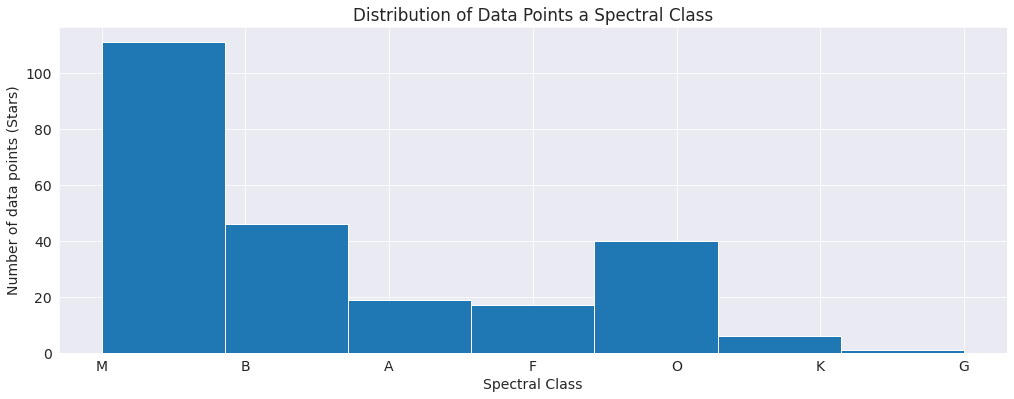

In [34]:
#histogram with 7 bins corresponding to the 7 spectral classes, plotting number of stars in each class
plt.hist(stars_df.Spectral_Class, bins = 7)
plt.title("Distribution of Data Points a Spectral Class")
plt.xlabel('Spectral Class')
plt.ylabel('Number of data points (Stars)')

* We can also try to see the Spectral makeup of each of the Star types. In other words, we can see for every star type, how many of each spectral class the stars belong to. This way we can try to find a correlation between a stars spectral class and its star type.

In [35]:
#creates a dataframe for each of the spectral classes
M_df = stars_df[stars_df.Spectral_Class == 'M']
B_df = stars_df[stars_df.Spectral_Class == 'B']
A_df = stars_df[stars_df.Spectral_Class == 'A']
F_df = stars_df[stars_df.Spectral_Class == 'F']
O_df = stars_df[stars_df.Spectral_Class == 'O']
K_df = stars_df[stars_df.Spectral_Class == 'K']
G_df = stars_df[stars_df.Spectral_Class == 'G']

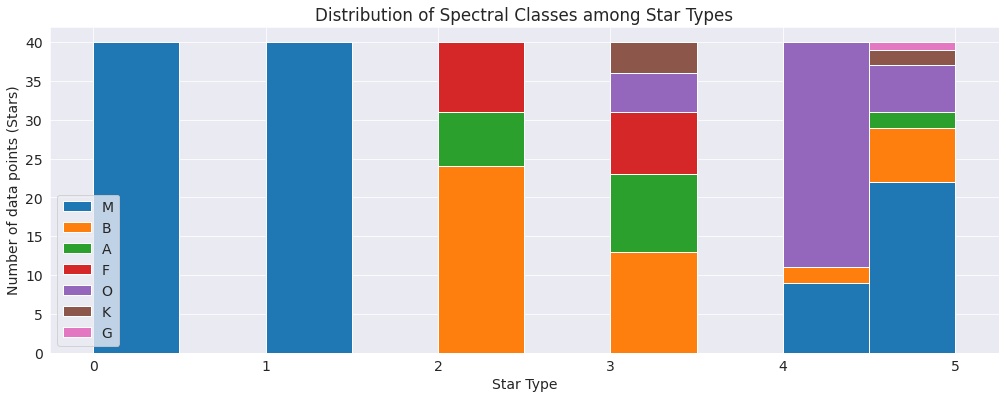

In [36]:
#plot each spectral class dataframe into a histogram
plt.hist([M_df.Star_type, 
          B_df.Star_type, 
          A_df.Star_type, 
          F_df.Star_type, 
          O_df.Star_type, 
          K_df.Star_type, 
          G_df.Star_type],
         stacked = True,
        )

plt.title("Distribution of Spectral Classes among Star Types")
plt.xlabel('Star Type')
plt.ylabel('Number of data points (Stars)')
plt.legend(['M', 'B', 'A', 'F', 'O', 'K', 'G'])

* We can see here clearly the rough number of stars for each spectral class that there are in a given star type. For example, Brown and Red dwarves (types 0 and 1 respectively) exclusively seem to have an M-spectral class.

* Inversely, we can also determine what star type a star is likely to be, based on what spectral class they are. We can see above that O-class stars (denoted by the color purple) are mostly Supergiants (star type 4). 

* Neatly, we learn that the dataset contains an equal number of data points (stars) for each star type (40 stars per type, totalling 240 data points throughout the dataframe).

# Temperature vs Spectral class

* Below is a look at how star temperature corresponds to its spectral class. As one can see, K-class and M-class stars tend to be the coolest hovering below or around the 5000K range. One cannot infer anything about G class stars since there is only data from one G-class star.

* A-class and F-class stars come next in temperature and hover between the upper 5000K range up to the 15000K range.

* O-class and B- class stars are the hottest by a wide margin. They also have the largest length of temperature range.

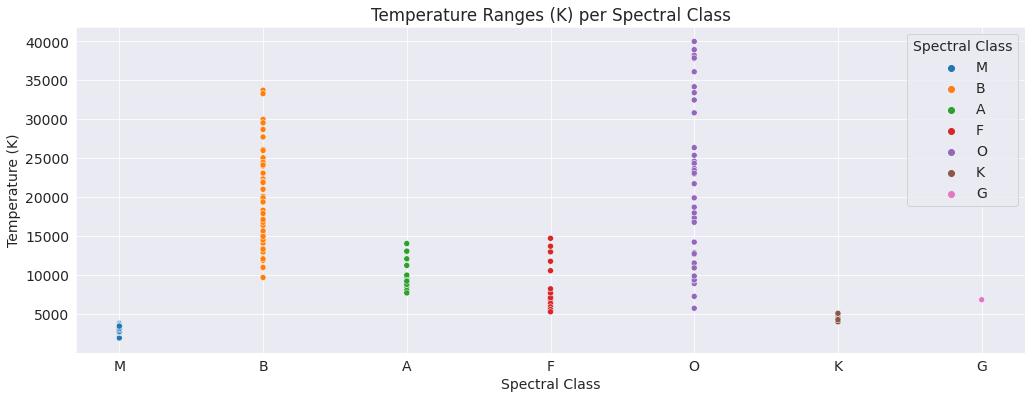

In [37]:
#creates scatterplot of the temperatures of each star, separated by what spectral class they are
sns.scatterplot(x = stars_df["Spectral_Class"], y = stars_df["Temperature_(K)"], hue = stars_df.Spectral_Class)
plt.title("Temperature Ranges (K) per Spectral Class")
plt.xlabel('Spectral Class')
plt.ylabel('Temperature (K)')
plt.legend(title = 'Spectral Class')

Here we plot star type against the temperature of the star, to try to find a correlation between them. We can see some spectral classes appear in only certain star types.For example, O-class stars appear to be type 3+ but not below. From earlier, star types 3, 4, and 5 represent Main Sequence stars, Supergiants, and Hypergiants respectvely. From the scatterplot below, we can say with some confidence that most O-class stars are only present from the Main Sequence to the Hypergiant range.

We also see some clustering of colors (which denotes spectral class) within the different temperature ranges in each star type. For example, for type 3 stars, we see stars ranging from 15000K to 30000K belonging exclusively to the B-class (yellow dots). Stars that are hotter than this are exclusively O-class. There are A-, F-, and K-class stars all below this range in the type 3 bin which all also cluster with very little to no crossover between each temperature range.

* Using this, we can make a prediction about a star's spectral class, given its type and temperature.

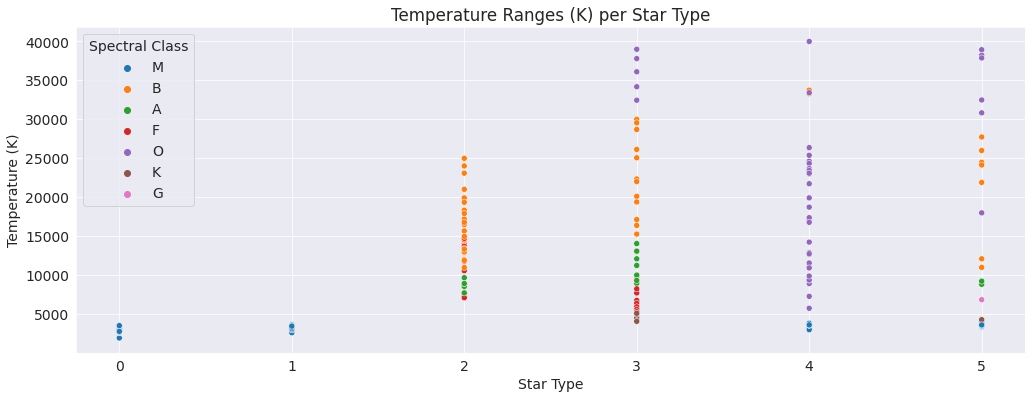

In [38]:
#creates scatterplot of star type vs temperature of each star
sns.scatterplot(y = stars_df["Temperature_(K)"], x = stars_df["Star_type"], hue = stars_df.Spectral_Class)
plt.title("Temperature Ranges (K) per Star Type")
plt.xlabel('Star Type')
plt.ylabel('Temperature (K)')
plt.legend(title = 'Spectral Class')

# Data Questions

# 1. Can we predict star color, given it's temperature?

* To try to find a correlation between a star's temperature and it's color. We can plot it's temperature against its color.

In [39]:
#creating a dataframe sorted by star color
temp_vs_color_df = stars_df.sort_values('Star_color', ascending = True)

#counting the number of stars of a particular color
count_color = stars_df.groupby('Star_color')['Star_color'].count
count_color()

Star_color
blue                 56
bluewhite            41
orange                2
orangered             1
paleyelloworange      1
red                 112
white                10
whiteyellow           1
whitish               2
yellowish             3
yellowishwhite        3
yellowwhite           8
Name: Star_color, dtype: int64

* We can plot this dataframe temp_vs_color_df here:

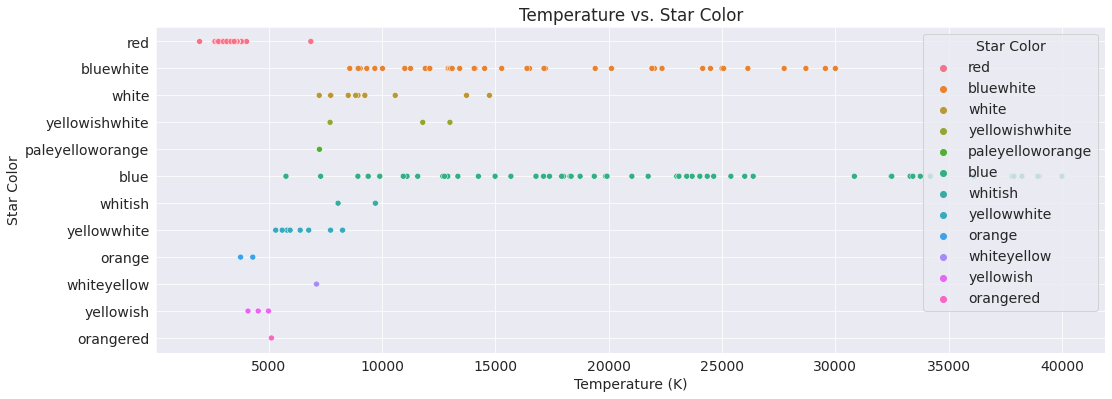

In [40]:
#plot temperature 
temp_vs_color_df
sns.scatterplot(data = stars_df, x = "Temperature_(K)", y = "Star_color", hue = stars_df.Star_color, legend = True)
plt.xlabel("Temperature (K)")
plt.ylabel("Star Color")
plt.title("Temperature vs. Star Color")
plt.legend(title = 'Star Color')

This plot would be more ideal if we had a sort of "ascending" or "descending" way to organize the colors of the stars like we do with numbers. Because of this, the plot is limited and we cannot predict the color of a star given a certain temperature. However, we can see some distinct features of some colored stars. Namely, blue and blue-white stars have a very wide temperature range, and can achieve temperatures much greater than the other star colors. Therefore, if the temperature of some random star given is very high, say 25,000K, we can be very confident that this star is blue or blue-white in color.

 # 2. Can we build an H-R Diagram from this dataset?

* An H-R Diagram or Hertzsprung-Russel Diagram, helps us to classify stars by plotting the Temperature vs. Relative Luminosity. Depending on where a star is on this diagram, will determine what star type they are likely to be.

In [41]:
#create dataframe to use to plot the H-R Diagram, sorting by temperature, since we want it on the x-axis
hr_df = stars_df.sort_values("Temperature_(K)", ascending = True)
hr_df

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class
4,1939,0.000138,0.103,20.06,0,red,M
2,2600,0.000300,0.102,18.70,0,red,M
7,2600,0.000400,0.096,17.40,0,red,M
78,2621,0.000600,0.098,12.81,1,red,M
6,2637,0.000730,0.127,17.22,0,red,M
...,...,...,...,...,...,...,...
239,37882,294903.000000,1783.000,-7.80,5,blue,O
231,38234,272830.000000,1356.000,-9.29,5,blue,O
235,38940,374830.000000,1356.000,-9.93,5,blue,O
30,39000,204000.000000,10.600,-4.70,3,blue,O


# Plotting against Luminosity

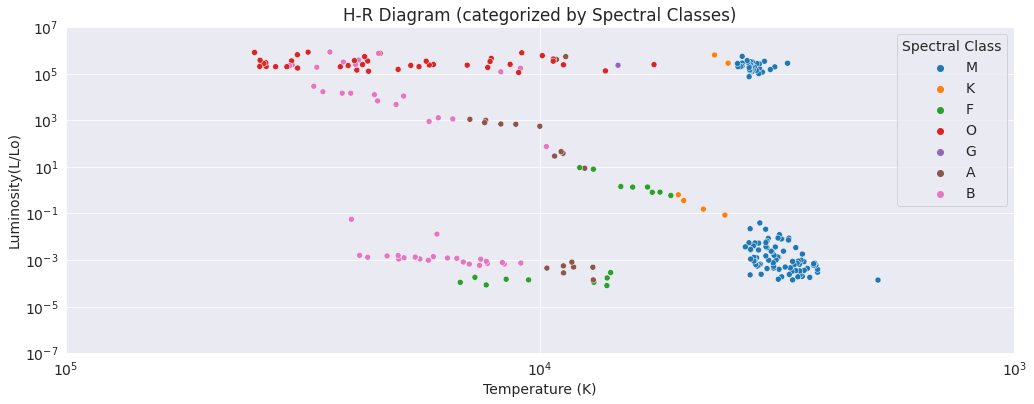

In [42]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Spectral Class
ax = sns.scatterplot(data = hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)", hue = "Spectral_Class")

#change axes scales to be logarithmic instead of linear
ax.set_yscale('log')
ax.set_xscale('log')

#change the axes limits to show over desired area
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))

#reverse x axis so that ascending, positive values go from left to right
plt.xlim(reversed(plt.xlim()))

plt.title("H-R Diagram (categorized by Spectral Classes)")
plt.xlabel("Temperature (K)")
plt.legend(title = 'Spectral Class')

Now our plot is formatted in a way similar to that of an H-R Diagram. What we end up with is a plot that resembles the shape of an H-R diagram and its regions. We can see that there are three main clusters: the relatively flat line in the bottom, the relatively flat line at the top, and the slanted line in between them. These lines correspond to the dwarf stars, giant stars, and the main sequence stars respectively.

Below we can plot the same graph, but change the hue to be dependent on the star type so that we can more clearly compare and see this. We should see that the dots should get darker towards the top of the plot, indicating that they are giants, and lighter towards the bottom indicating that they are dwarves.

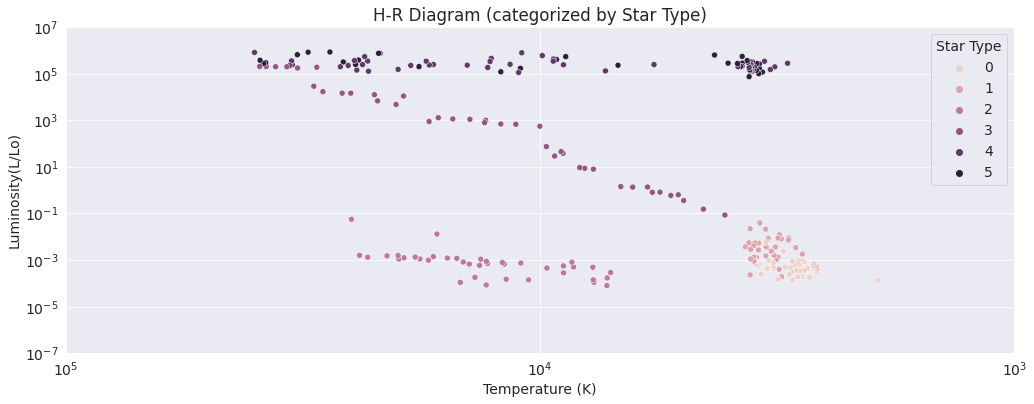

In [43]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Star Type
ax = sns.scatterplot(data = hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)", hue = "Star_type")

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram (categorized by Star Type)")
plt.xlabel("Temperature (K)")
plt.legend(title = 'Star Type')

As you can see, the lighter dots towards the bottom are correspondent of types 0, 1, and 2 which correspond to brown, red, and white dwarves respectively. As we move up the main sequence (slanted line), we see a lot of type 3 hue dots. This makes sense as this is where we would expect the main sequence stars to be. At the top, the region we see is filled with dark dots which we interpret as types 4 and 5, and correspond to Supergiants and Hypergiants, respectively.

* Intuitively, this plot also makes sense when looking at it from a luminosity perspective. Huge Supergiant and Hypergiant stars are expected to have a much greater relative luminosity (shine brighter) than their dwarf counterparts.

As we change the hue dependence to the colors of the stars, we see a similar story. While the hues themselves don't match up to the actual colors of the stars that they represent, we see that as you move from the  right of the plot to the left, we see stars turn from red, to yellow, to white, to a blue color. This is also accurate as blue stars tend to be the hottest, red stars tend to be the coolest, and yellow and white stars are in between (with white stars typically being hotter than yellow stars).

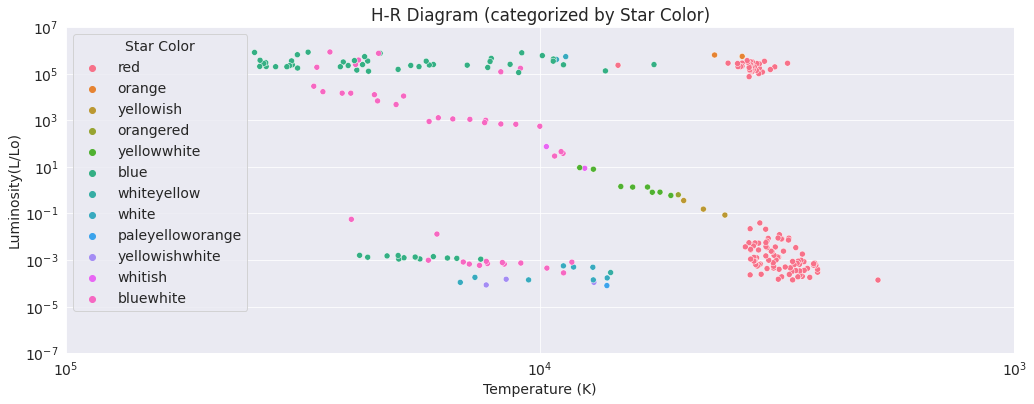

In [44]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Star Color
ax = sns.scatterplot(data = hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)", hue = "Star_color")

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram (categorized by Star Color)")
plt.xlabel("Temperature (K)")
plt.legend(title = 'Star Color')

# Plotting against Absolute Magnitude

* If we plot this graph as a function of Absolute Magnitude instead of Luminosty, we see that the graphs' forms seem to flip  vertically. This is also reasonable since Absolute Magnitude is just another measure of the stars brightness (i.e. Luminosity). However Absolute magnitude is scaled with the more negative values corresponding to a higher brightness, which essentially flips the y-axis, hence why we see a vertical flip in the graphs below.

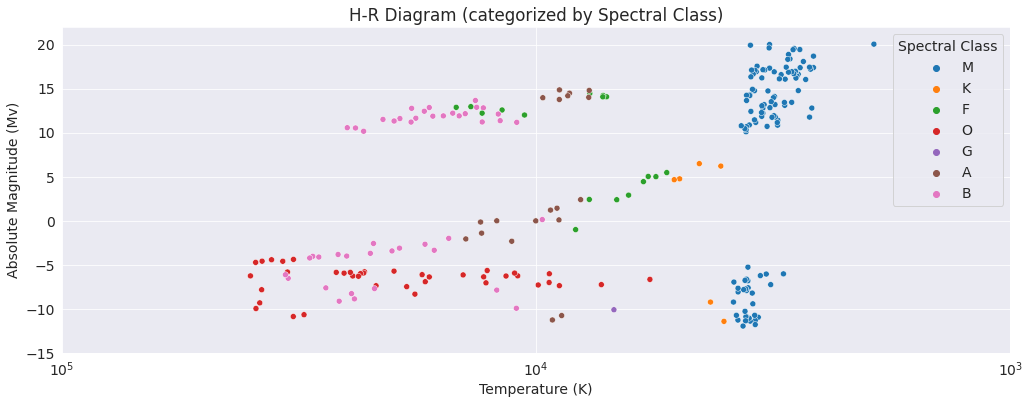

In [45]:
#plotting the function of Temperature vs. Absolute Magnitude categorizing by Spectral Class
ax = sns.scatterplot(data = hr_df, x = "Temperature_(K)", y = "Absolute_magnitude(Mv)", hue = "Spectral_Class")


ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((-15),(22))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram (categorized by Spectral Class)")
plt.xlabel("Temperature (K)")
plt.ylabel("Absolute Magnitude (Mv)")
plt.legend(title = 'Spectral Class')

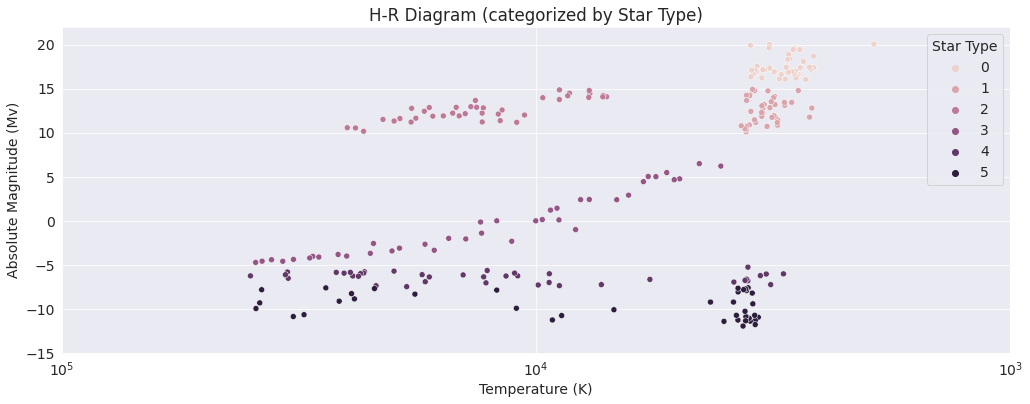

In [46]:
#plotting the function of Temperature vs. Absolute Magnitude categorizing by Star Type
ax = sns.scatterplot(data = hr_df, x = "Temperature_(K)", y = "Absolute_magnitude(Mv)", hue = "Star_type")


ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((-15),(22))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram (categorized by Star Type)")
plt.xlabel("Temperature (K)")
plt.ylabel("Absolute Magnitude (Mv)")
plt.legend(title = 'Star Type')

While our plots aren't very rigorously accurate representations of an H-R Diagram, they take on a similar form. This lets us be able to predict things such as the star color, type, and spectral class given its luminosity and temperature.

# 3. Visually seeing the different clusters

* Say we want to visually see the different clusters in this given plot more clearly. This time we can change the hue to be a boolean of whether or not a star belongs to a particular star type so that we only differentiate between whether or not a star is a Giant or not. This will let us clearly see where the Giant stars cluster up in relation to the others.

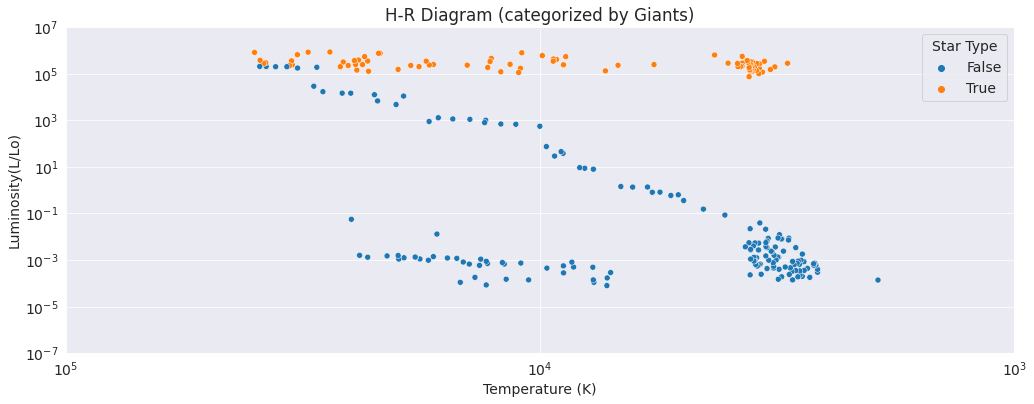

In [47]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Star Type

#Setting hue to differentiate between type 3+ stars and below, remembering that types 4 and 5 correspond to the Giant stars
ax = sns.scatterplot(data = hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)", hue = (hr_df['Star_type'] > 3))

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram (categorized by Giants)")
plt.xlabel("Temperature (K)")
plt.legend(title = 'Star Type')

* Now we can visually and more easily tell where Giant stars land on our plot compared with the rest of the stars. We can see that the Giants are colored as yellow dots, and hold a value of 'True" in the legend since they fulfill the criteria of being greater than type 3. We can do the same with the following two plots, distinguishing between dwarf stars, and main sequence stars to see more clearly what the region they occupy looks like.

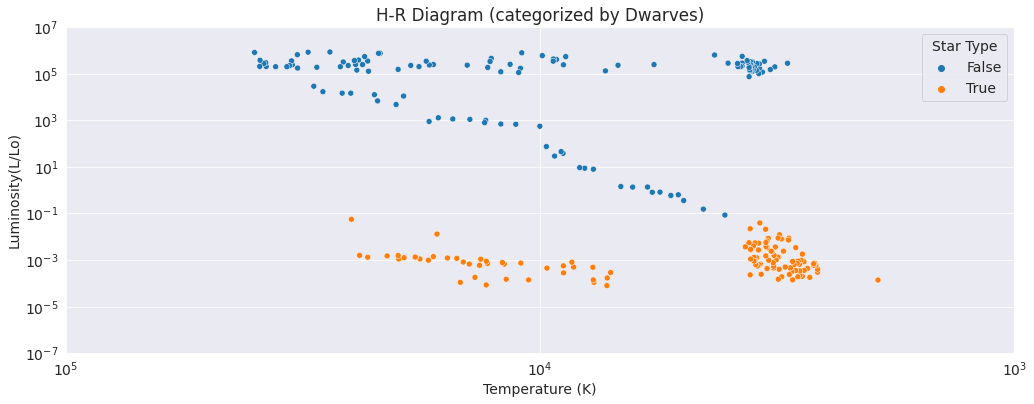

In [48]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Star Type

#Setting hue to differentiate between type 3+ stars and below, remembering that types 0, 1, and 2 correspond tot he Drawf stars
ax = sns.scatterplot(data = hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)", hue = (hr_df['Star_type'] < 3))

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram (categorized by Dwarves)")
plt.xlabel("Temperature (K)")
plt.legend(title = 'Star Type')

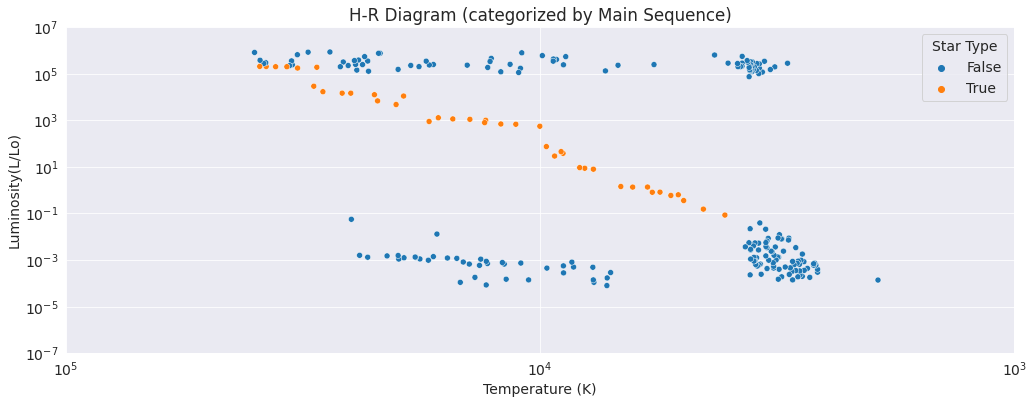

In [49]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Star Type

#Setting hue to differentiate between type 3 stars and the rest, remembering that type 3 correpsonds to Main Sequence stars
ax = sns.scatterplot(data = hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)", hue = (hr_df['Star_type'] == 3))

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram (categorized by Main Sequence)")
plt.xlabel("Temperature (K)")
plt.legend(title = 'Star Type')

# 4. Clustering the Giants

* We can take this a step further, and then cluster the two different Giants to see if they are intermixed, or occupy a certain space within the top branch of the plots. First we create a dataframe consisting only of all of the giants in the original **stars_df** dataframe

In [50]:
#Create a dataframe from hr_df of only type 4+ stars (Giants)
giants_hr_df = hr_df[hr_df.Star_type > 3]
giants_hr_df

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class
44,3008,280000.0,25.0,-6.00,4,red,M
43,3200,195000.0,17.0,-7.22,4,red,M
42,3270,150000.0,88.0,-6.02,4,red,M
41,3365,340000.0,23.0,-6.20,4,red,M
113,3399,117000.0,1486.0,-10.92,5,red,M
...,...,...,...,...,...,...,...
49,33750,220000.0,26.0,-6.10,4,blue,B
239,37882,294903.0,1783.0,-7.80,5,blue,O
231,38234,272830.0,1356.0,-9.29,5,blue,O
235,38940,374830.0,1356.0,-9.93,5,blue,O


* Then we plot this dataframe to see the top branch of our original H-R Diagram, which is consisted of the giants.

Text(0.5, 0, 'Temperature (K)')

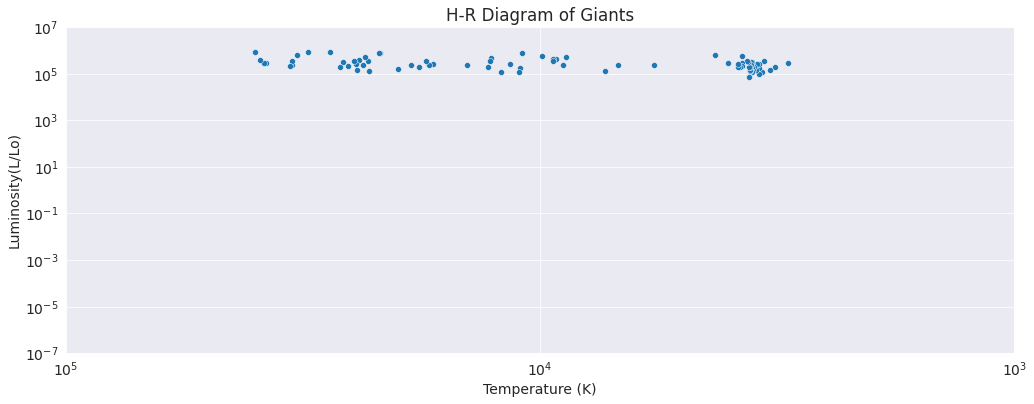

In [51]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Star Type

#Setting hue to differentiate between type 4 stars adn type 5 stars, remembering that type 4 stars correspond to Supergiants and type 5 stars correspond to Hypergiants
ax = sns.scatterplot(data = giants_hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)")

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram of Giants")
plt.xlabel("Temperature (K)")

* Below we can plot the dataframe of the giant stars, highlighting the Hypergiants in yellow and Supergiants in blue. We can see that there is not much correlation between where a star is on the Giants branch, and whether it is a Supergiant or a Hypergiant. However, we do see that most of the Hypergiants are clustered very cloesly together towards the right side of the Giants branch.

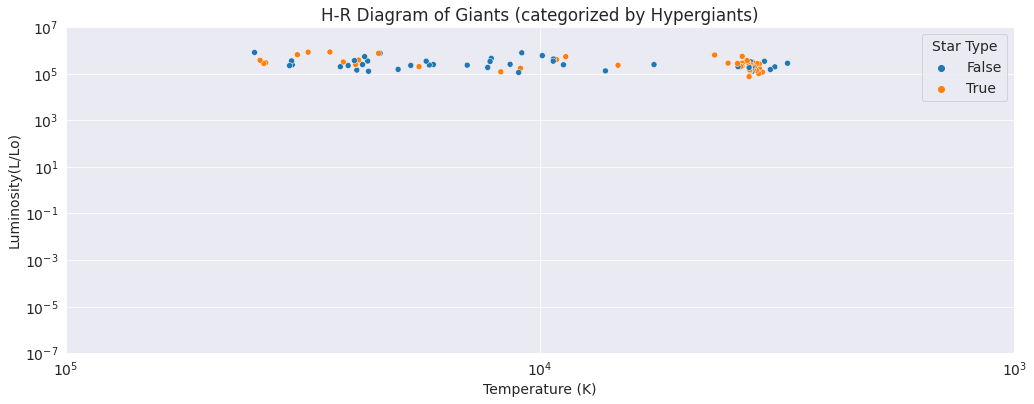

In [52]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Star Type

#Setting hue to differentiate between type 4 stars adn type 5 stars, remembering that type 4 stars correspond to Supergiants and type 5 stars correspond to Hypergiants
ax = sns.scatterplot(data = giants_hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)", hue = (giants_hr_df['Star_type'] > 4))

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram of Giants (categorized by Hypergiants)")
plt.xlabel("Temperature (K)")
plt.legend(title = 'Star Type')

# 5. Clustering the Dwarves

* We can also try to understand the clustering of Dwarf stars on the H-R Diagram. First we will create a dataframe of only Dwarf stars.

In [53]:
#Create a dataframe from hr_df of only type 0-2 stars (Dwarves)
dwarves_hr_df = hr_df[hr_df.Star_type < 3]
dwarves_hr_df

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class
4,1939,0.000138,0.1030,20.06,0,red,M
2,2600,0.000300,0.1020,18.70,0,red,M
7,2600,0.000400,0.0960,17.40,0,red,M
78,2621,0.000600,0.0980,12.81,1,red,M
6,2637,0.000730,0.1270,17.22,0,red,M
...,...,...,...,...,...,...,...
205,19920,0.001560,0.0142,11.34,2,blue,B
141,21020,0.001500,0.0112,11.52,2,blue,B
207,23092,0.001320,0.0104,10.18,2,blue,B
206,24020,0.001590,0.0127,10.55,2,blue,B


* We can plot this dataframe so that we see the bottom branch of our originial H-R Diagram, consisting of the Dwarf Stars. We can see two initial clusters of data points. One is a triangle shaped cluster on th right, and the other is a loosely horizontal line on the left.

Text(0.5, 0, 'Temperature (K)')

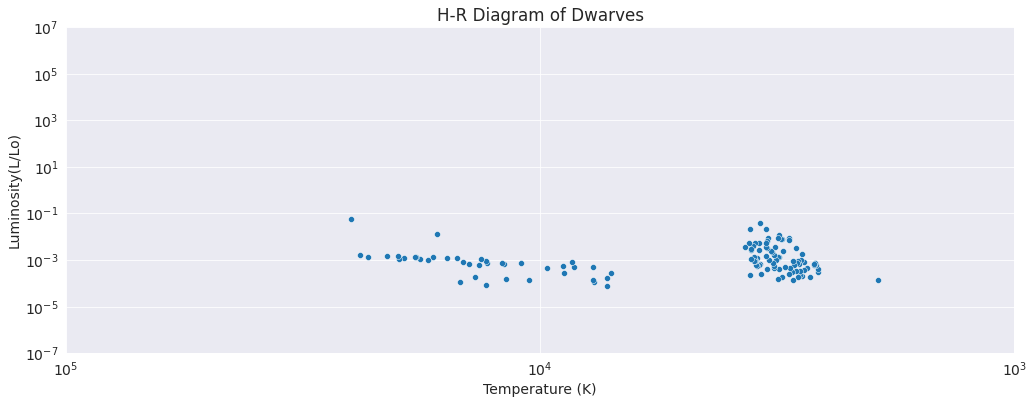

In [54]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Star Type

#Setting hue to differentiate between type 0 dwarves the other dwarves, remembering that type 0 stars correspond to Brown dwarves
ax = sns.scatterplot(data = dwarves_hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)")

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram of Dwarves")
plt.xlabel("Temperature (K)")

* Next, we can categorize by the type of dwarf star (Brown, Red, or White), to see if there are any clusters within this overall Data of Dwarf stars. We start first with the Brown dwarves, highlighting them in yellow.

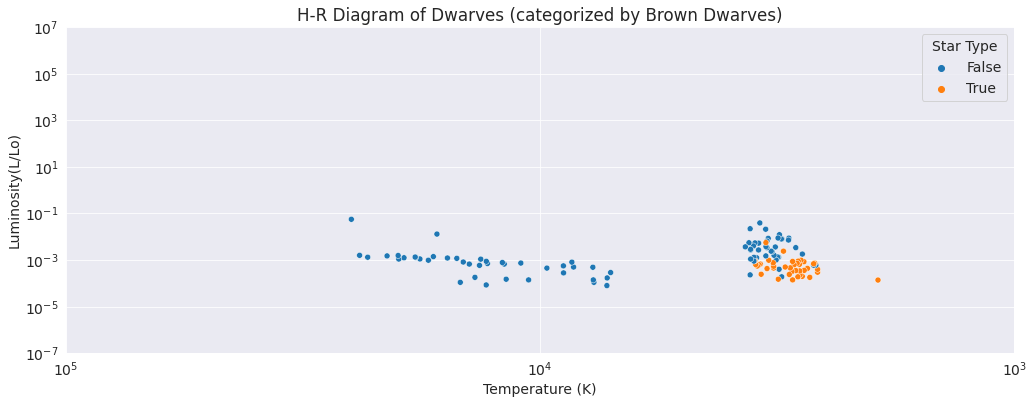

In [55]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Star Type

#Setting hue to differentiate between type 0 dwarves the other dwarves, remembering that type 0 stars correspond to Brown dwarves
ax = sns.scatterplot(data = dwarves_hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)", hue = (dwarves_hr_df['Star_type'] < 1))

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram of Dwarves (categorized by Brown Dwarves)")
plt.xlabel("Temperature (K)")
plt.legend(title = 'Star Type')

* Initially we could only see two clusters of data points. The cluster on the right which appears as a sort of triangle shape, and the cluster on the left which is a loosely horizontal line.
* Now, by highlighting the types of stars, we can see a yellow cluster arise within the triangle shaped cluster on the right. 

* Below, we plot the Red dwarves and see another cluster within the triangle shaped cluster arise.

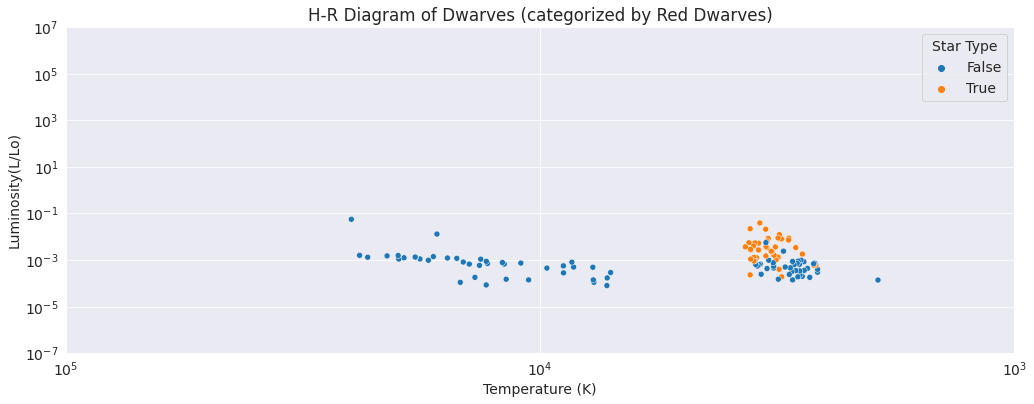

In [56]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Star Type

#Setting hue to differentiate between type 1 dwarves the other dwarves, remembering that type 1 stars correspond to Red dwarves
ax = sns.scatterplot(data = dwarves_hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)", hue = (dwarves_hr_df['Star_type'] == 1))

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram of Dwarves (categorized by Red Dwarves)")
plt.xlabel("Temperature (K)")
plt.legend(title = 'Star Type')

* As we can see, Brown and Red dwarves are very closely located on our H-R diagram. However, they do have clear clusters within this overall cluster.

* Now we can highlight the White dwarves.

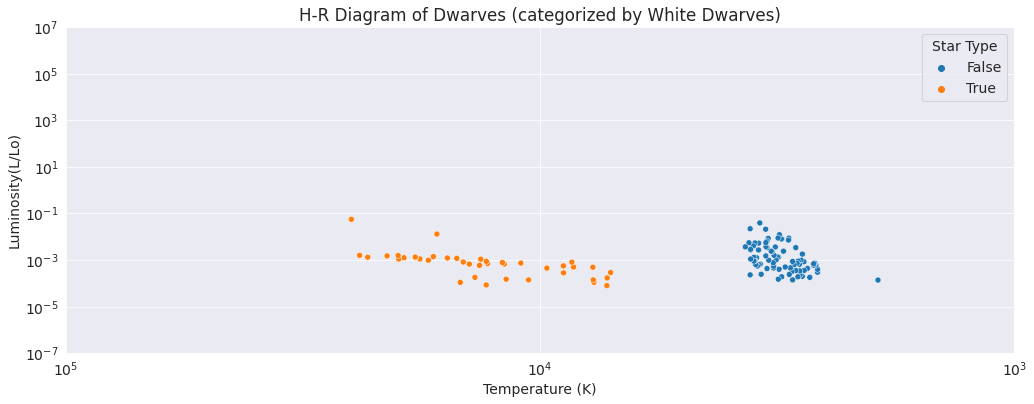

In [57]:
#plotting the function of Temperature vs. Relative Luminosity categorizing by Star Type

#Setting hue to differentiate between type 2 dwarves the other dwarves, remembering that type 2 stars correspond to White dwarves
ax = sns.scatterplot(data = dwarves_hr_df, x = "Temperature_(K)", y = "Luminosity(L/Lo)", hue = (dwarves_hr_df['Star_type'] > 1))

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1e3,1e5)
plt.ylim((10**-7), (10**7))
plt.xlim(reversed(plt.xlim()))
plt.title("H-R Diagram of Dwarves (categorized by White Dwarves)")
plt.xlabel("Temperature (K)")
plt.legend(title = 'Star Type')

* Above, we can see that the left cluster resembling a horizontal line, is actually comprised entirely of White dwarves.

We end up with three total cluters, or regions, when we initally only saw two within the data for Dwarf stars. While the brown and red dwarf clusters and very close to each other, it is possibly to predict what type a dwarf star could be, depending on where inside the overall cluster the star lands on. As for the white dwarves, their cluster is very distinct and separate from the other Dwarf types. If a star is plotted in this cluster, we can say with high confidence that is a White dwarf.

# Conclusions

While the H-R plots generated weren't perfect, one could still see a general pattern among the star types when plotted as a function of luminosity. If we are given a plot, collect the parameters of temperature and luminosity (or absolute magnitude) for a given star, and plot that star onto the plot, we can have some confidence about the general type of star (dwarf, main sequence, or giant) that it is depending on where in the plot the star sample is located. Furthermore, we can even try to predict the specific star type (Brown vs Red vs White Dwarf, or Supergiant vs Hypergiant) depending once again on where the star is located within the individually segmented plots of the H-R diagram.